# Data Cleaning and Exploratory Data Analysis for CryptoCurrency Historical Prices

The aim of the analysis is determining the Opening and Closing prices of different cryptocurrencies

# Data Cleaning 

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import seaborn as sns
plt.rcParams['figure.figsize'] = (20,20 )


In [3]:
ccdf  = pd.read_csv('cryptoPrices.csv', sep = ',')

In [4]:
ccdf.head()

,id,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta
0,1,1/9/2018,15123.7,15497.5,14424.0,14595.4,16660000000,253935000000,BTC,-0.034932
1,2,1/8/2018,16476.2,16537.9,14208.2,15170.1,18413900000,276612000000,BTC,-0.079272
2,3,1/7/2018,17527.3,17579.6,16087.7,16477.6,15866000000,294222000000,BTC,-0.059889
3,4,1/6/2018,17462.1,17712.4,16764.6,17527.0,18314600000,293091000000,BTC,0.003717
4,5,1/5/2018,15477.2,17705.2,15202.8,17429.5,23840900000,259748000000,BTC,0.126140


This shows whether the dataset has been loaded correctly 

In [5]:
ccdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9226 entries, 0 to 9225
Data columns (total 10 columns):
id            9226 non-null int64
Date          9225 non-null object
Open          9050 non-null float64
High          9037 non-null float64
Low           9061 non-null float64
Close         9050 non-null float64
Volume        9226 non-null object
Market.Cap    9226 non-null object
coin          9226 non-null object
Delta         9043 non-null float64
dtypes: float64(5), int64(1), object(4)
memory usage: 720.9+ KB


This shows the general information regarding the dataset and tells that there are some missing values 


# Identifying null values

In [6]:
ccdf.isnull().sum()

id              0
Date            1
Open          176
High          189
Low           165
Close         176
Volume          0
Market.Cap      0
coin            0
Delta         183
dtype: int64

# Identifying placeholder data

In [7]:
ccdf.loc[ccdf['Open'].isnull()]

,id,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta
9000,9001,NaN,NaN,NaN,NaN,NaN,No data was found for the selected time period.,No data was found for the selected time period.,FRCT,NaN
9001,9002,1/10/2018,NaN,NaN,NaN,NaN,5234,16768,NANOX,NaN
9002,9003,1/9/2018,NaN,NaN,NaN,NaN,1617,18835,NANOX,NaN
9003,9004,1/8/2018,NaN,NaN,NaN,NaN,2314,15294,NANOX,NaN
9004,9005,1/7/2018,NaN,NaN,NaN,NaN,2665,20195,NANOX,NaN
9005,9006,1/6/2018,NaN,NaN,NaN,NaN,7185,20263,NANOX,NaN
9006,9007,1/5/2018,NaN,NaN,NaN,NaN,12315,21387,NANOX,NaN
9007,9008,1/4/2018,NaN,NaN,NaN,NaN,8182,33714,NANOX,NaN
9008,9009,1/3/2018,NaN,NaN,NaN,NaN,6528,32882,NANOX,NaN
9009,9010,1/2/2018,NaN,NaN,NaN,NaN,4036,25043,NANOX,NaN


In [8]:
ccdf.loc[ccdf['Close'].isnull()]

,id,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta
9000,9001,NaN,NaN,NaN,NaN,NaN,No data was found for the selected time period.,No data was found for the selected time period.,FRCT,NaN
9001,9002,1/10/2018,NaN,NaN,NaN,NaN,5234,16768,NANOX,NaN
9002,9003,1/9/2018,NaN,NaN,NaN,NaN,1617,18835,NANOX,NaN
9003,9004,1/8/2018,NaN,NaN,NaN,NaN,2314,15294,NANOX,NaN
9004,9005,1/7/2018,NaN,NaN,NaN,NaN,2665,20195,NANOX,NaN
9005,9006,1/6/2018,NaN,NaN,NaN,NaN,7185,20263,NANOX,NaN
9006,9007,1/5/2018,NaN,NaN,NaN,NaN,12315,21387,NANOX,NaN
9007,9008,1/4/2018,NaN,NaN,NaN,NaN,8182,33714,NANOX,NaN
9008,9009,1/3/2018,NaN,NaN,NaN,NaN,6528,32882,NANOX,NaN
9009,9010,1/2/2018,NaN,NaN,NaN,NaN,4036,25043,NANOX,NaN


In [9]:
ccdf.loc[ccdf['High'].isnull()]

,id,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta
9000,9001,NaN,NaN,NaN,NaN,NaN,No data was found for the selected time period.,No data was found for the selected time period.,FRCT,NaN
9001,9002,1/10/2018,NaN,NaN,NaN,NaN,5234,16768,NANOX,NaN
9002,9003,1/9/2018,NaN,NaN,NaN,NaN,1617,18835,NANOX,NaN
9003,9004,1/8/2018,NaN,NaN,NaN,NaN,2314,15294,NANOX,NaN
9004,9005,1/7/2018,NaN,NaN,NaN,NaN,2665,20195,NANOX,NaN
9005,9006,1/6/2018,NaN,NaN,NaN,NaN,7185,20263,NANOX,NaN
9006,9007,1/5/2018,NaN,NaN,NaN,NaN,12315,21387,NANOX,NaN
9007,9008,1/4/2018,NaN,NaN,NaN,NaN,8182,33714,NANOX,NaN
9008,9009,1/3/2018,NaN,NaN,NaN,NaN,6528,32882,NANOX,NaN
9009,9010,1/2/2018,NaN,NaN,NaN,NaN,4036,25043,NANOX,NaN


In [10]:
ccdf.loc[ccdf['Low'].isnull()]

,id,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta
9000,9001,NaN,NaN,NaN,NaN,NaN,No data was found for the selected time period.,No data was found for the selected time period.,FRCT,NaN
9001,9002,1/10/2018,NaN,NaN,NaN,NaN,5234,16768,NANOX,NaN
9002,9003,1/9/2018,NaN,NaN,NaN,NaN,1617,18835,NANOX,NaN
9003,9004,1/8/2018,NaN,NaN,NaN,NaN,2314,15294,NANOX,NaN
9004,9005,1/7/2018,NaN,NaN,NaN,NaN,2665,20195,NANOX,NaN
9005,9006,1/6/2018,NaN,NaN,NaN,NaN,7185,20263,NANOX,NaN
9006,9007,1/5/2018,NaN,NaN,NaN,NaN,12315,21387,NANOX,NaN
9007,9008,1/4/2018,NaN,NaN,NaN,NaN,8182,33714,NANOX,NaN
9008,9009,1/3/2018,NaN,NaN,NaN,NaN,6528,32882,NANOX,NaN
9009,9010,1/2/2018,NaN,NaN,NaN,NaN,4036,25043,NANOX,NaN


In [11]:
ccdf.loc[ccdf['Open'] == 0]

,id,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta


In [12]:
ccdf.loc[ccdf['Close'] == 0]

,id,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta


In [13]:
ccdf.loc[ccdf['High'] == 0]

,id,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta


In [14]:
ccdf.loc[ccdf['Low'] == 0]

,id,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta


In [15]:
len(ccdf.loc[ccdf['Volume'] == '-'])

631

In [16]:
len(ccdf.loc[ccdf['Market.Cap'] == '-'])

125

There are many rows which have - or NA whose rows can be seen from the above operations. These rows have to filled or dropped based on the analysis of the dataset

In [17]:
ccdf = ccdf.dropna()

Since all the missing values are for the coin NANNOX,  the missing values ar non informative and cannot be filled with mean
or median and hence dropped

# Removing Strange variables

In [18]:
del ccdf['Delta']

In [19]:
ccdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9037 entries, 0 to 9074
Data columns (total 9 columns):
id            9037 non-null int64
Date          9037 non-null object
Open          9037 non-null float64
High          9037 non-null float64
Low           9037 non-null float64
Close         9037 non-null float64
Volume        9037 non-null object
Market.Cap    9037 non-null object
coin          9037 non-null object
dtypes: float64(4), int64(1), object(4)
memory usage: 706.0+ KB


Dataset information after cleaning the misssing data

# Determining Outliers

Identifying outliers to check whether any of the rows have to be eliminated for perfectly fitting the data in view of exploratory data analysis and later to apply machine learning algorithms on that dataset.

In [20]:
ccdf.describe()

,id,Open,High,Low,Close
count,9037.000000,9037.000000,9037.000000,9037.000000,9037.000000
mean,4519.118623,542.197194,606.528629,479.710547,539.981506
std,2609.106883,4343.612618,5126.491916,3580.906592,4305.339958
min,1.000000,0.000086,0.000089,0.000079,0.000086
25%,2260.000000,0.006631,0.006805,0.006462,0.006649
50%,4519.000000,2.200000,2.390000,2.090000,2.210000
75%,6778.000000,133.500000,139.460000,130.160000,134.780000
max,9075.000000,95898.400000,98990.700000,76950.900000,96080.300000


# Distribution before Data imputation

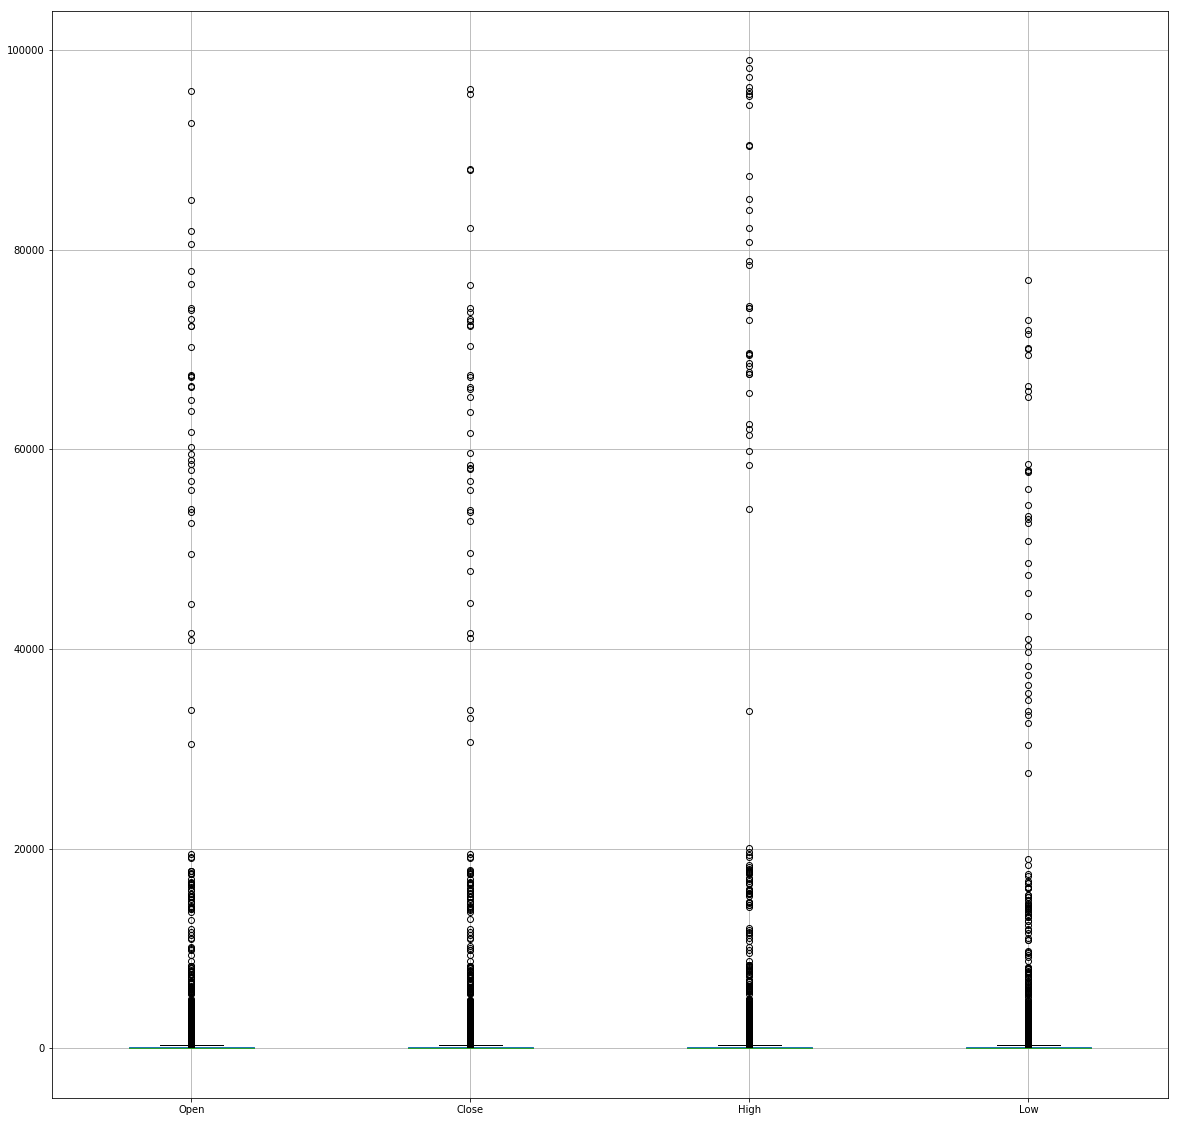

In [21]:
ccdf.boxplot(['Open', 'Close', 'High', 'Low'])

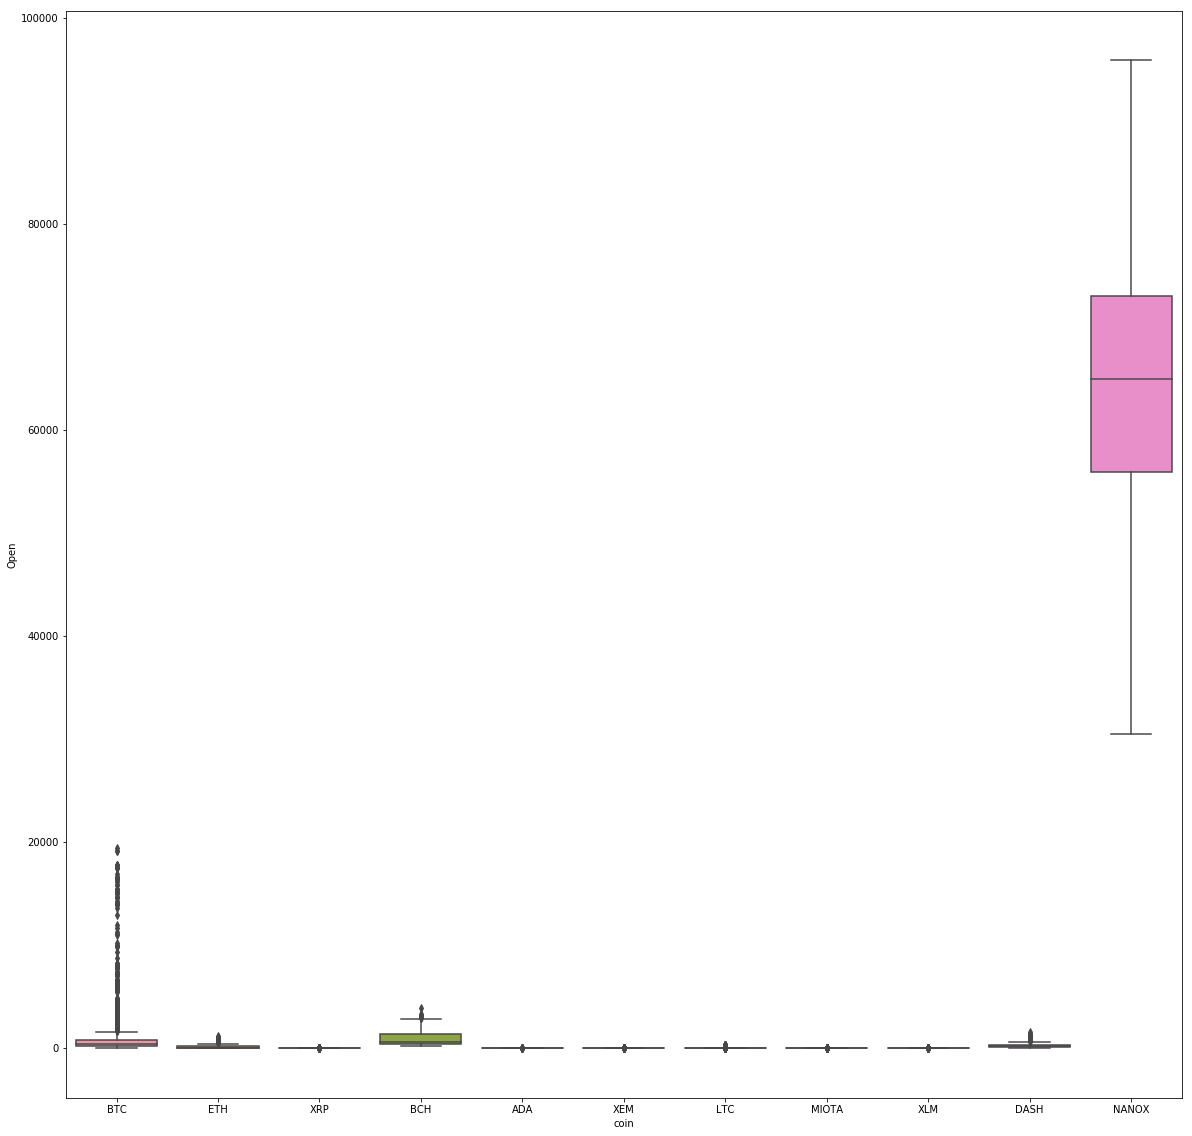

In [22]:
sns.boxplot(x= "coin", y ="Open" , data = ccdf)

The above boxplots show that there are too many outliers for the four main columns Open, Close, High and 
Low and this may affect the analysis . Thus the outliers have to be removed. 

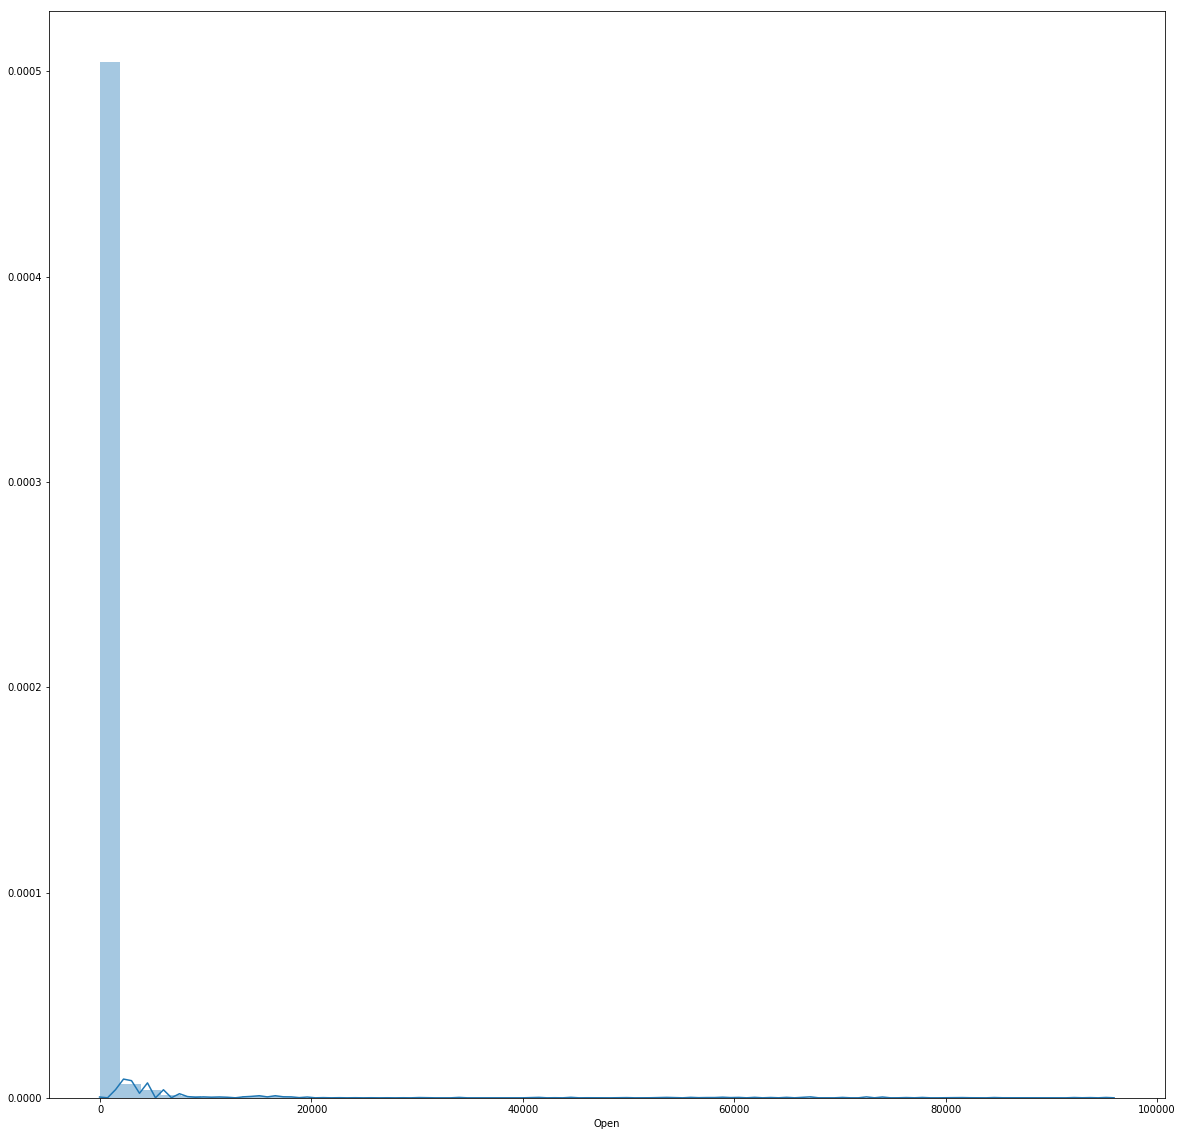

In [23]:
sns.distplot(ccdf['Open'])

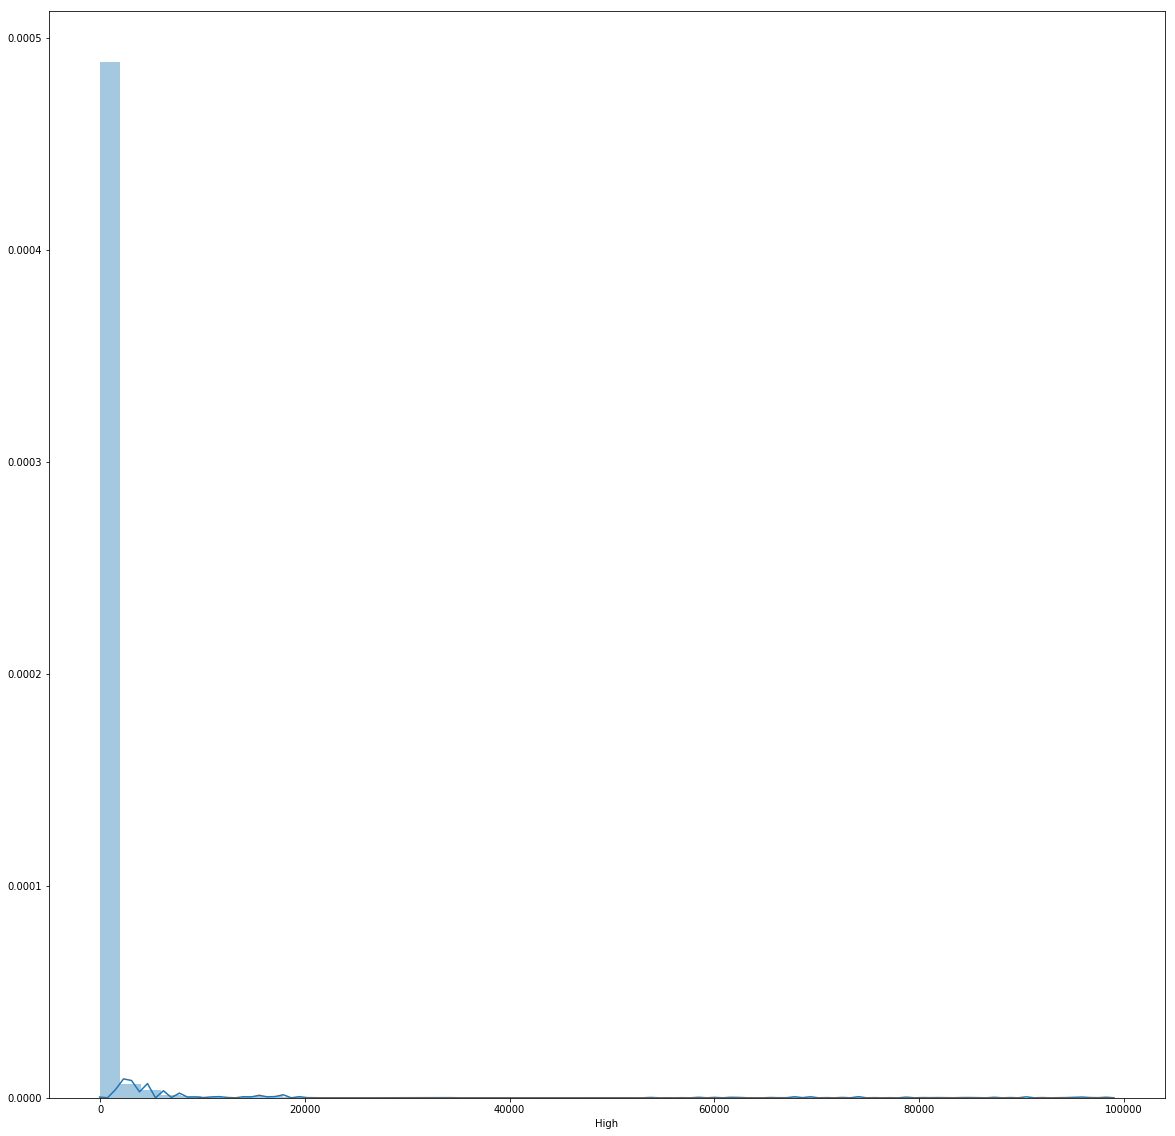

In [24]:
sns.distplot(ccdf['High'])

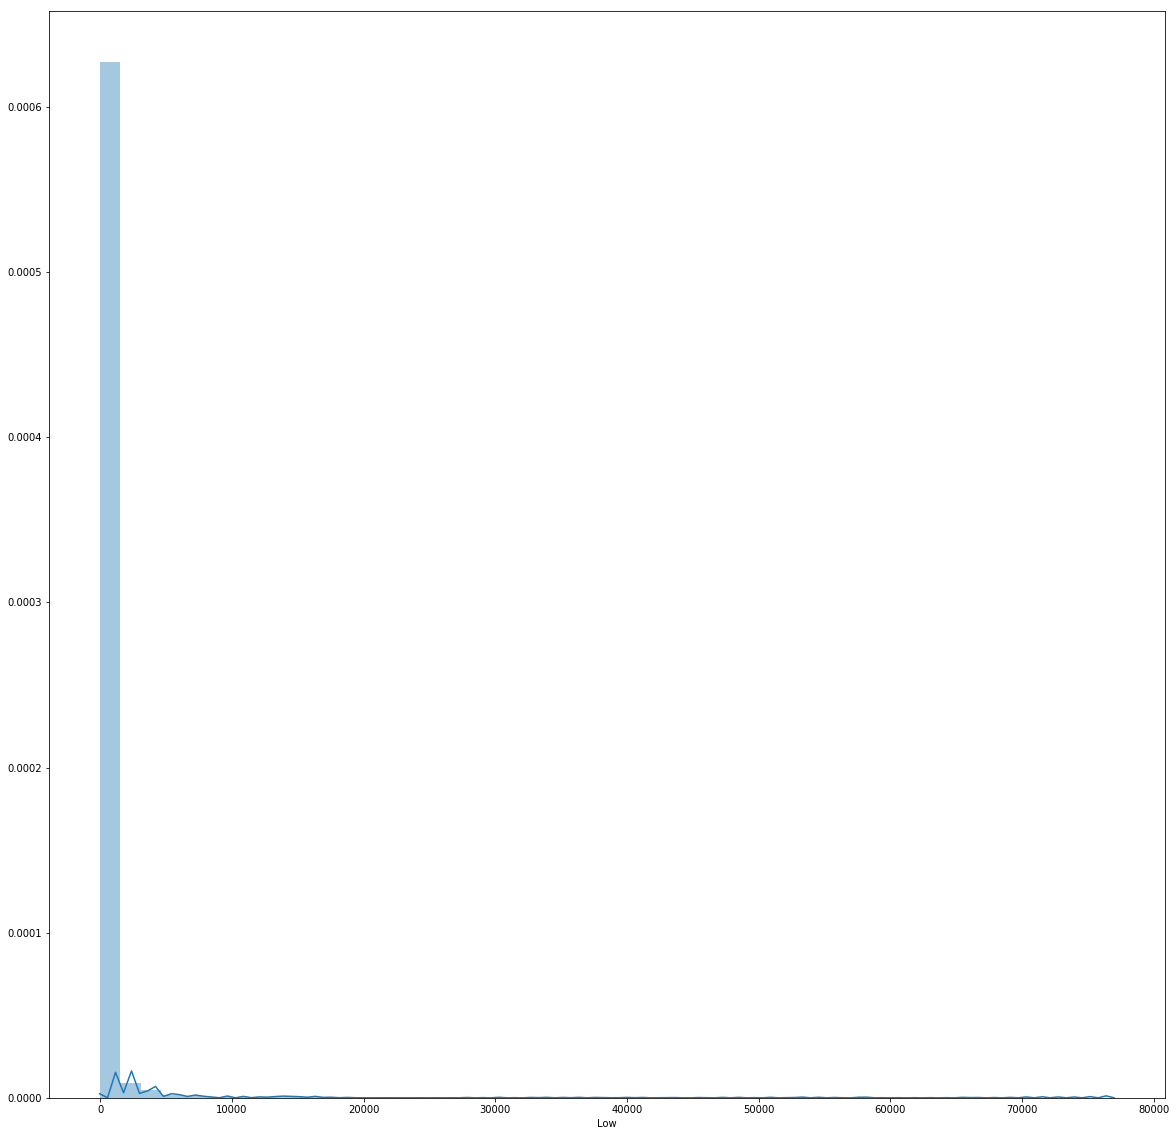

In [25]:
sns.distplot(ccdf['Low'])

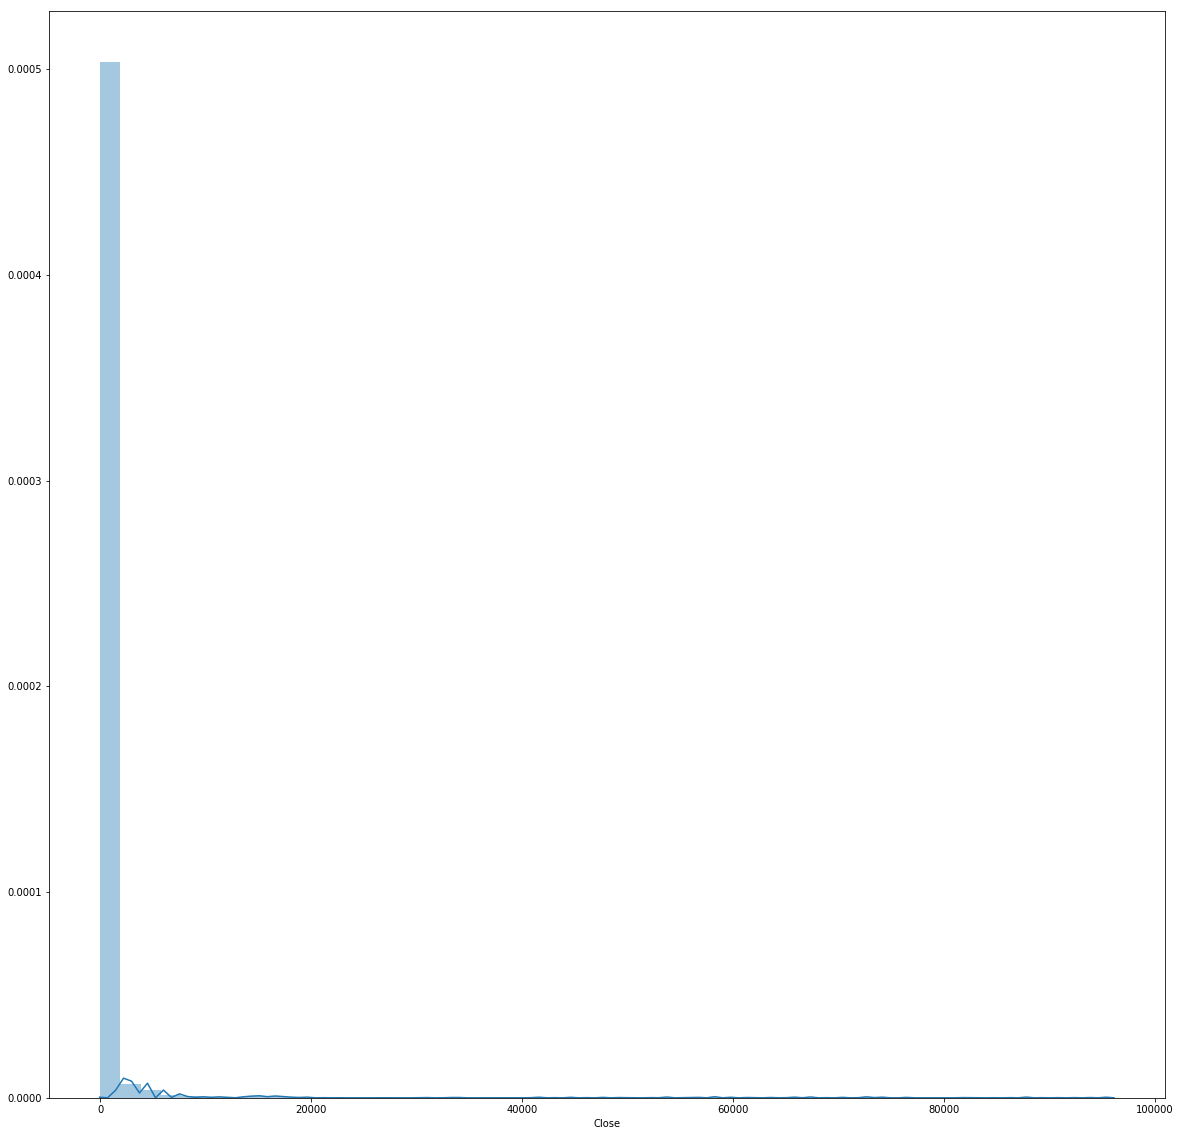

In [26]:
sns.distplot(ccdf['Close'])

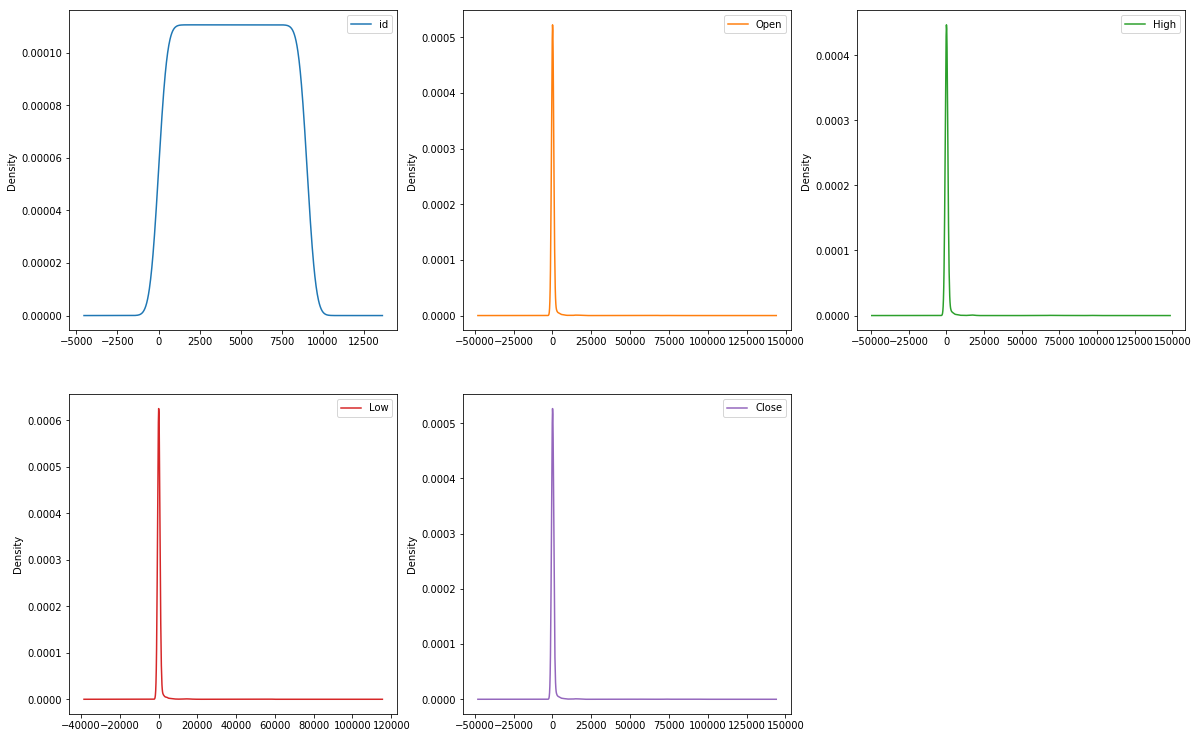

In [27]:
ccdf.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

The above density plots have been shown for the four main columns - Open, Close, High and Low
They show that some part of the data is skewed and this can affect the analysis when this data is applied to Machine learning algorithms. So the data has to be imputed for optimal analysis.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB435DE3C8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001DB43A7EBE0>]], dtype=object)

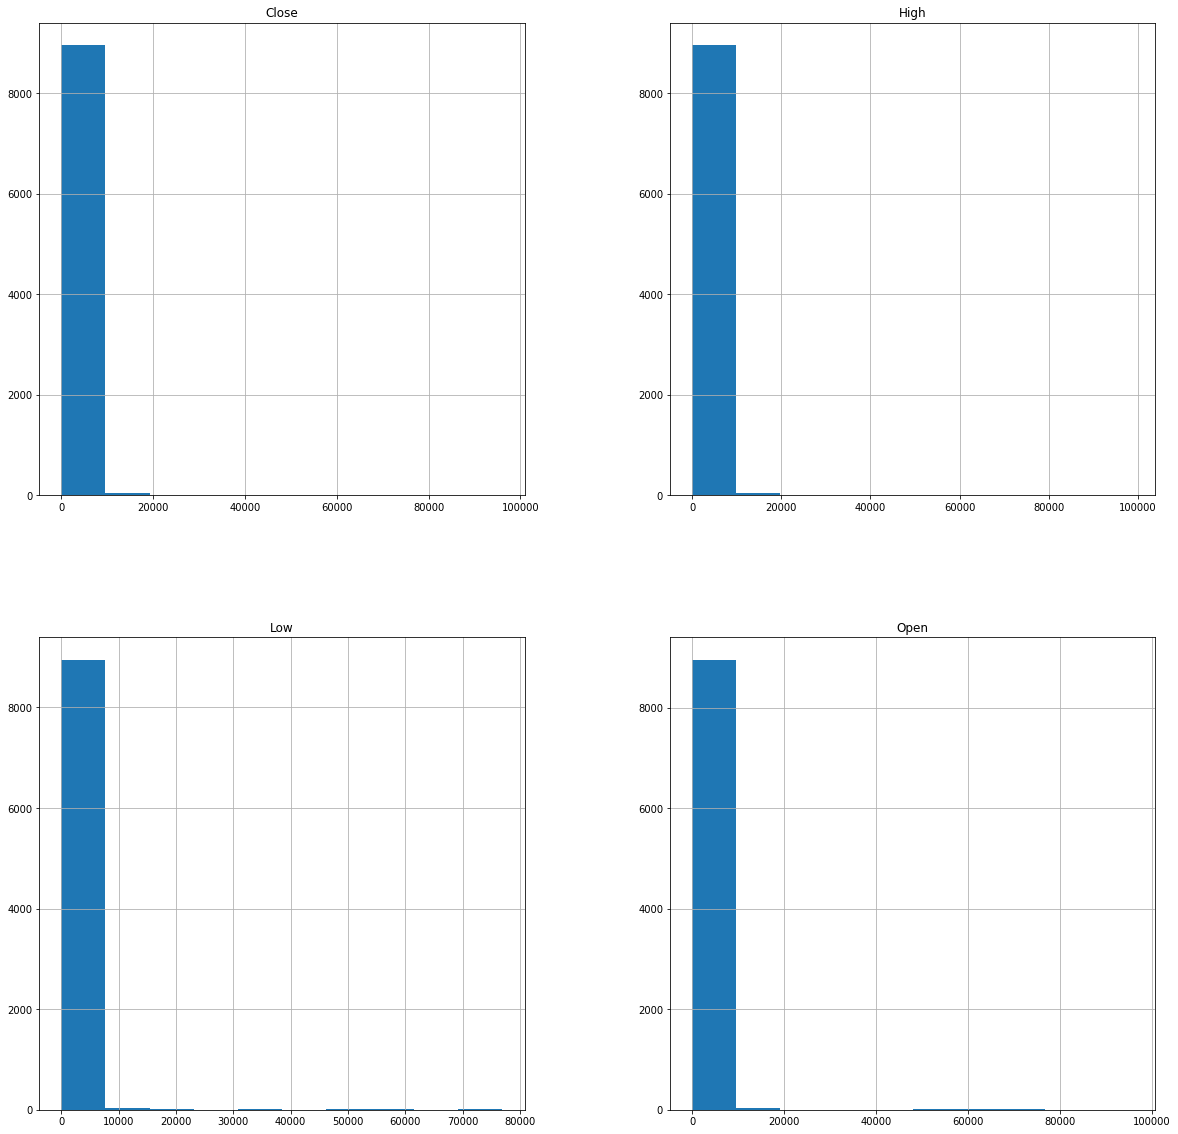

In [28]:
ccdf.hist(['Open','Close','High','Low'])

The above histogram shows that the data is not distributed and there needs to be a normal ditribution to get efficient analysis

# Data imputation 

In [29]:
ccdf = ccdf[ccdf.Open >200]

In [30]:
ccdf = ccdf[ccdf.Open < 400]

In [31]:
ccdf = ccdf[ccdf.High >200]

In [32]:
ccdf = ccdf[ccdf.High < 400]

In [33]:
ccdf = ccdf[ccdf.Low >200]

In [34]:
ccdf = ccdf[ccdf.Low < 400]

In [35]:
ccdf = ccdf[ccdf.Close >200]

In [36]:
ccdf = ccdf[ccdf.Close < 400]

The above distribution plots show that the data is not normally distributed so to make the data optimal for analysis the following data is filtered. 

In [37]:
ccdf.describe()

,id,Open,High,Low,Close
count,765.000000,765.000000,765.000000,765.000000,765.000000
mean,2382.090196,291.483529,300.133503,283.142118,291.795634
std,2546.412851,50.392933,51.917330,48.467602,49.984641
min,697.000000,203.900000,206.440000,200.060000,204.320000
25%,937.000000,243.770000,249.470000,238.330000,244.220000
50%,1133.000000,289.100000,298.780000,280.530000,290.410000
75%,1899.000000,330.170000,340.910000,317.950000,329.960000
max,8883.000000,397.590000,399.970000,391.780000,395.540000


This is used to show the statistical summary after imputing the data 

In [38]:
ccdf.head()


,id,Date,Open,High,Low,Close,Volume,Market.Cap,coin
696,697,2/13/2016,384.64,391.86,384.64,391.86,61911700,5847990000,BTC
697,698,2/12/2016,379.69,384.95,379.60,384.26,67042800,5771040000,BTC
698,699,2/11/2016,382.11,383.13,376.40,379.65,74375600,5806110000,BTC
699,700,2/10/2016,376.15,385.48,375.78,381.65,85130900,5713880000,BTC
700,701,2/9/2016,373.42,377.25,372.90,376.03,55318500,5670880000,BTC


# Plots after Data imputation

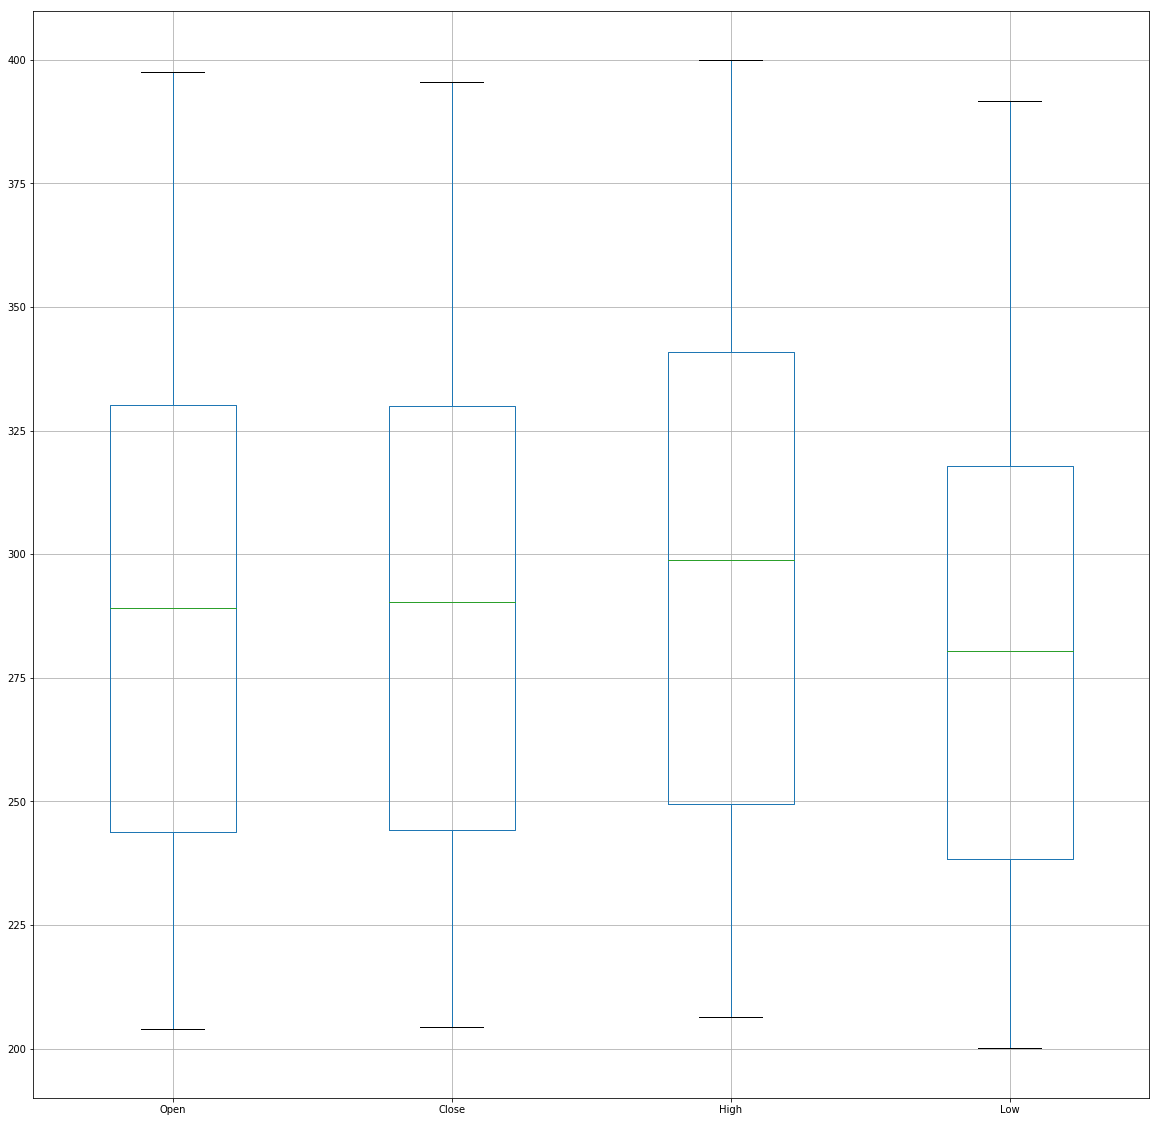

In [39]:
ccdf.boxplot(['Open', 'Close', 'High', 'Low'])

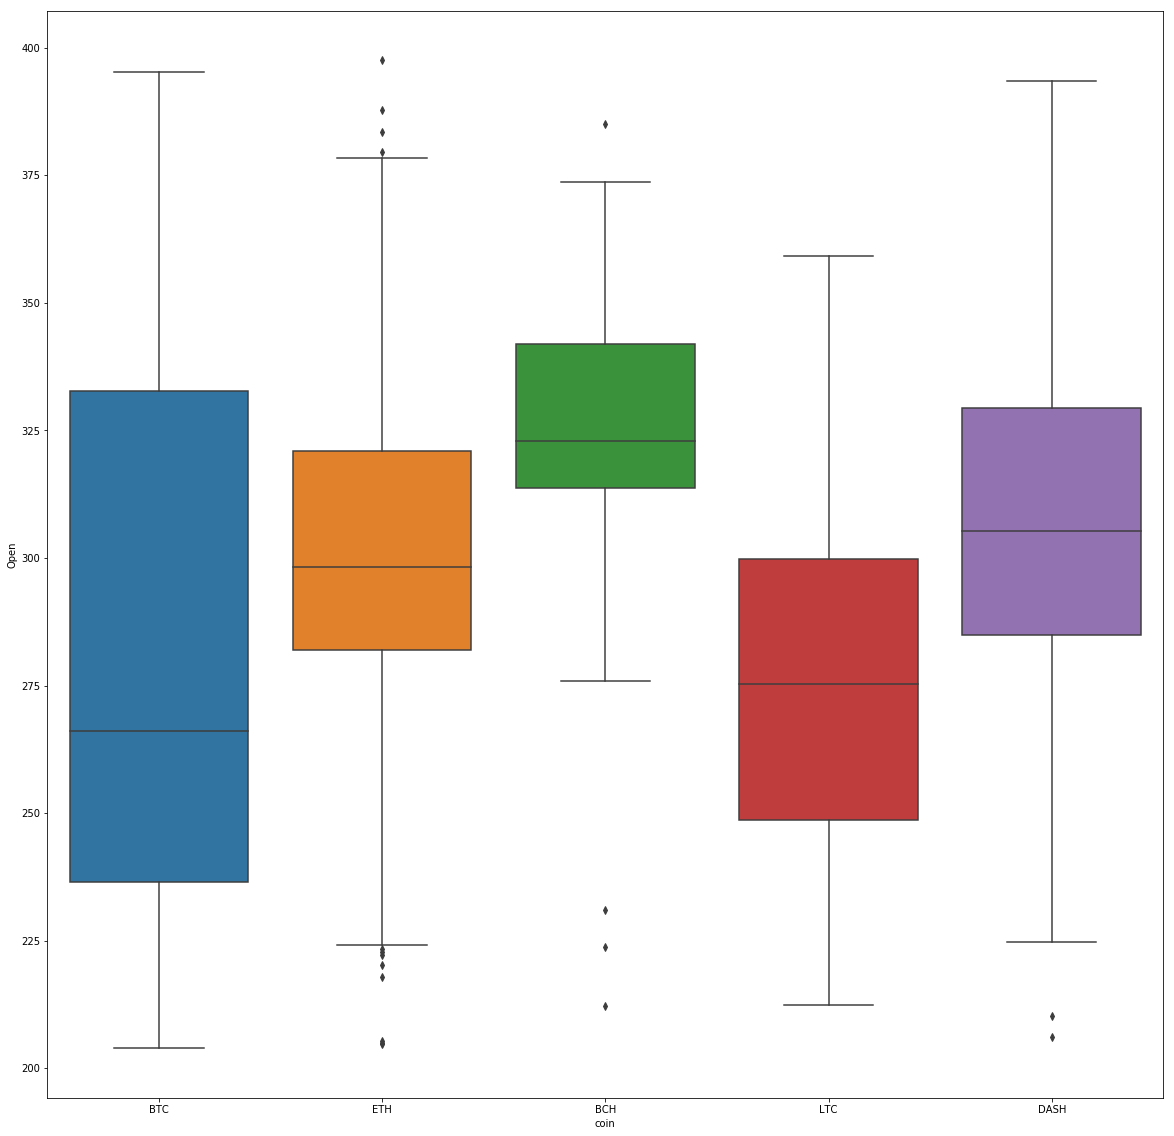

In [40]:
sns.boxplot(x= "coin", y ="Open" , data = ccdf)

The above boxplot after data imputation shows that many outliers have been removed after data imputation and this data can now be used for analysis. After the data imputation ,we see that the range of the data has been reduced and many outliers have been removed which includes the far fetched values which cannot be used for analysis. This makes the graph more readable and optimal for analysis

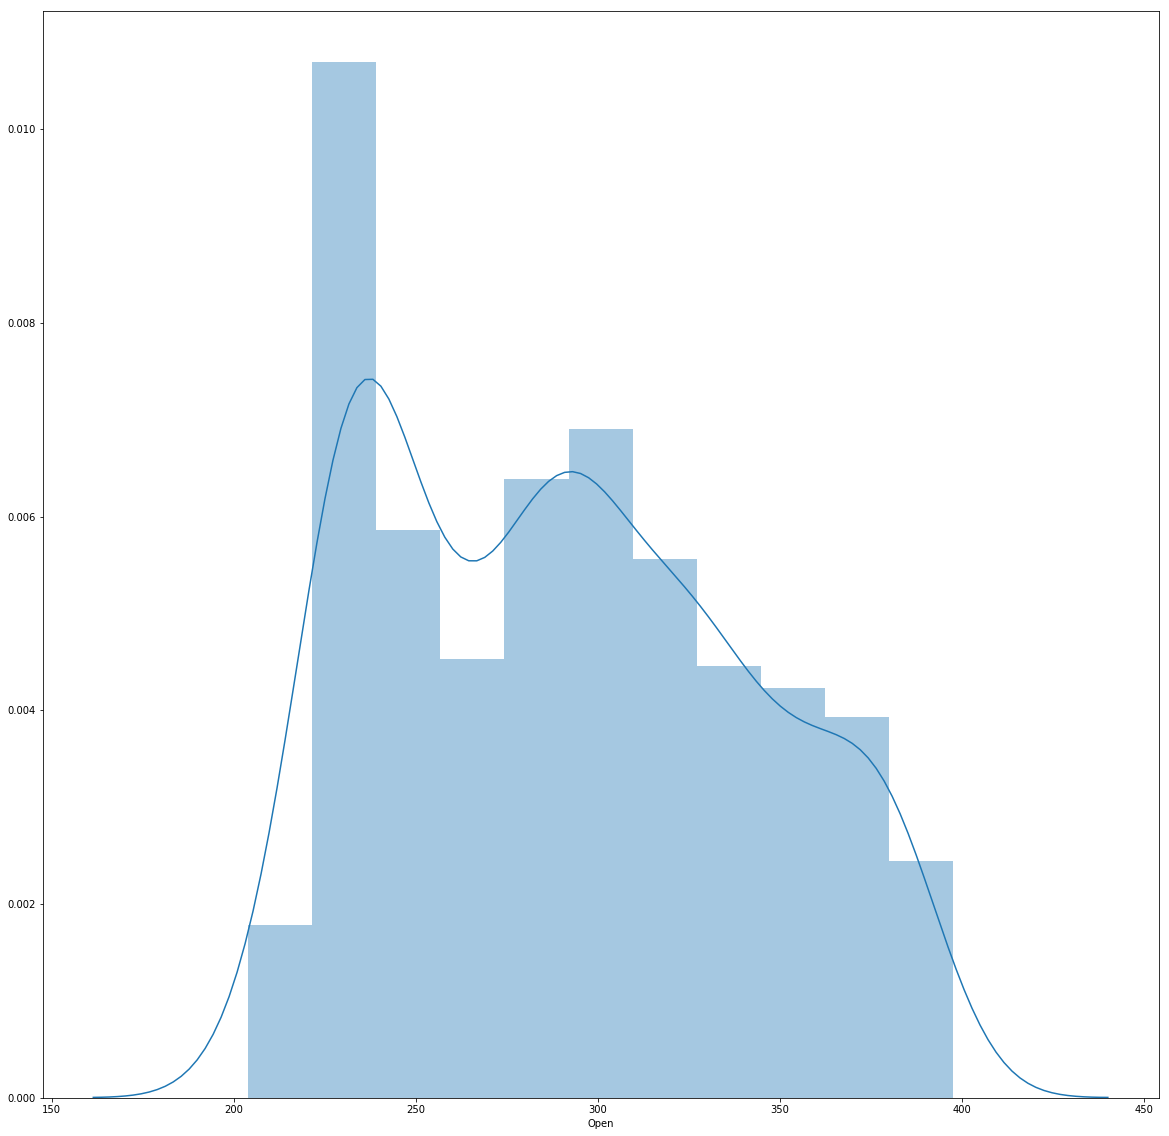

In [41]:
sns.distplot(ccdf['Open'])

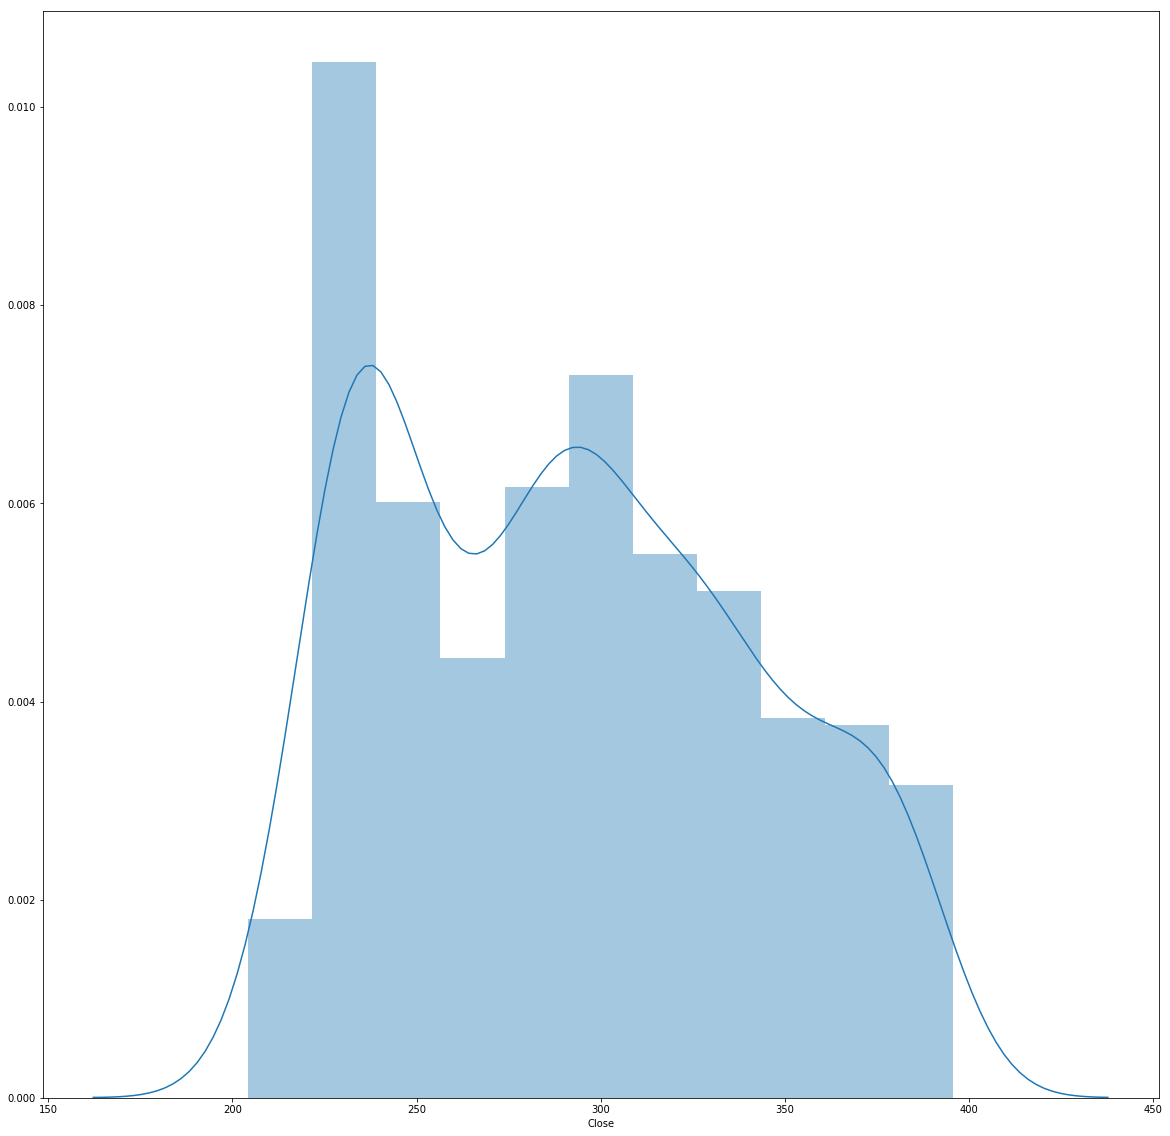

In [42]:
sns.distplot(ccdf['Close'])

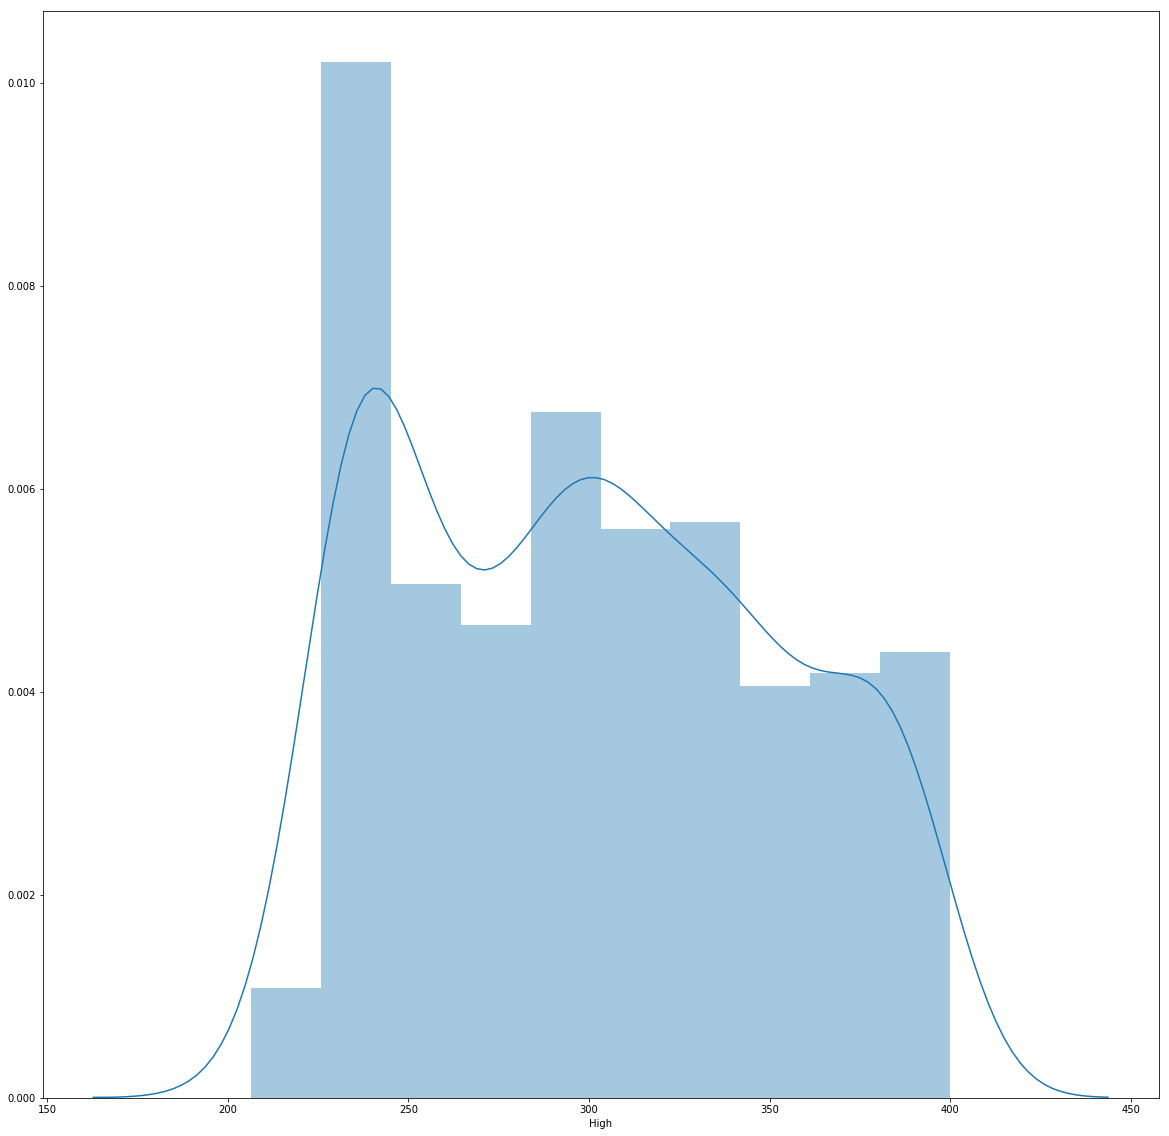

In [43]:
sns.distplot(ccdf['High'])

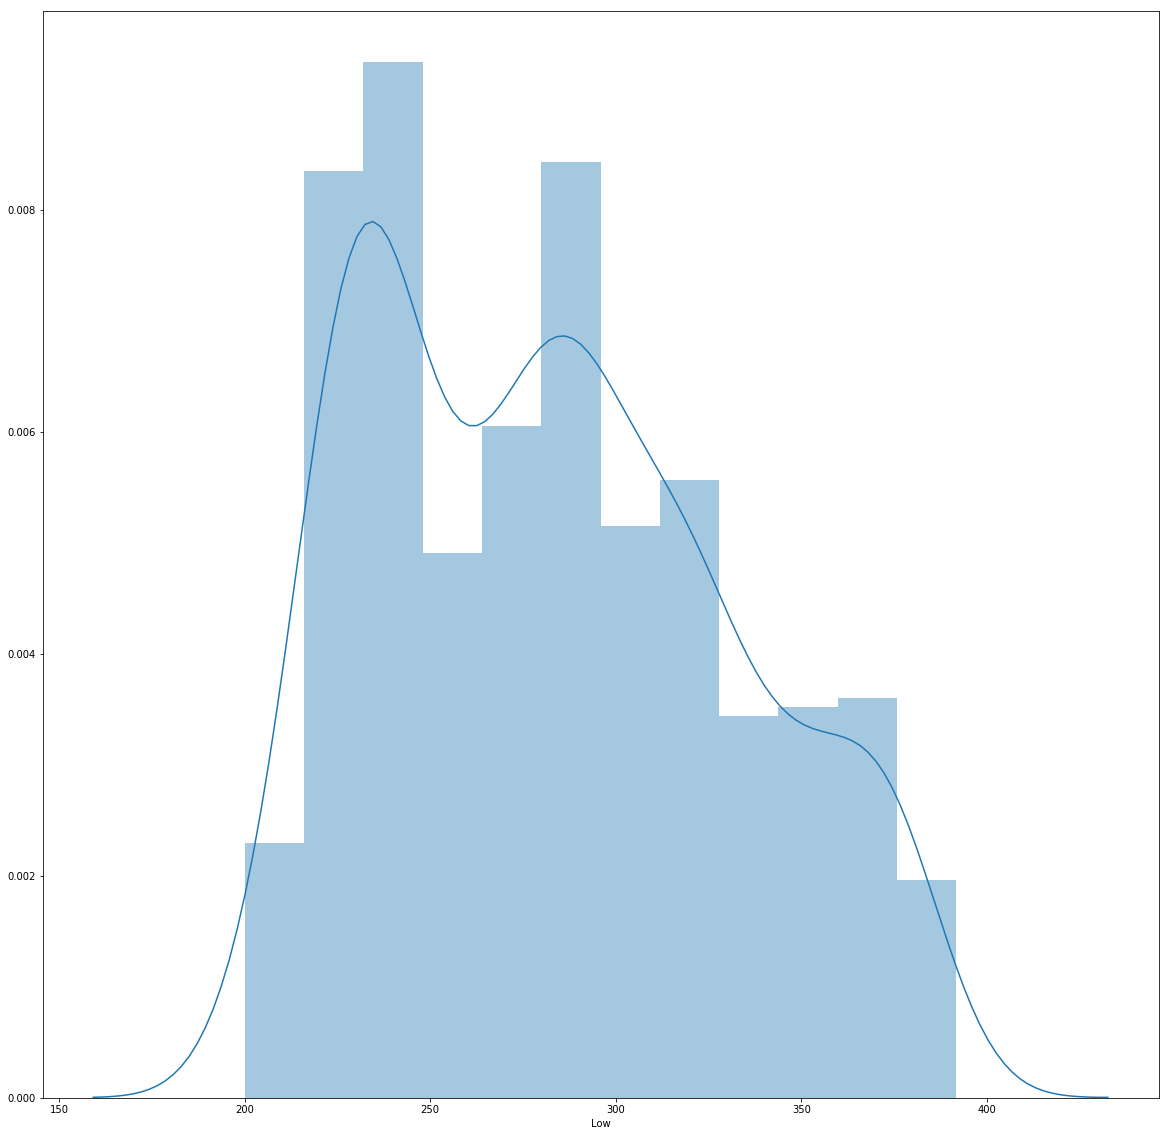

In [44]:
sns.distplot(ccdf['Low'])

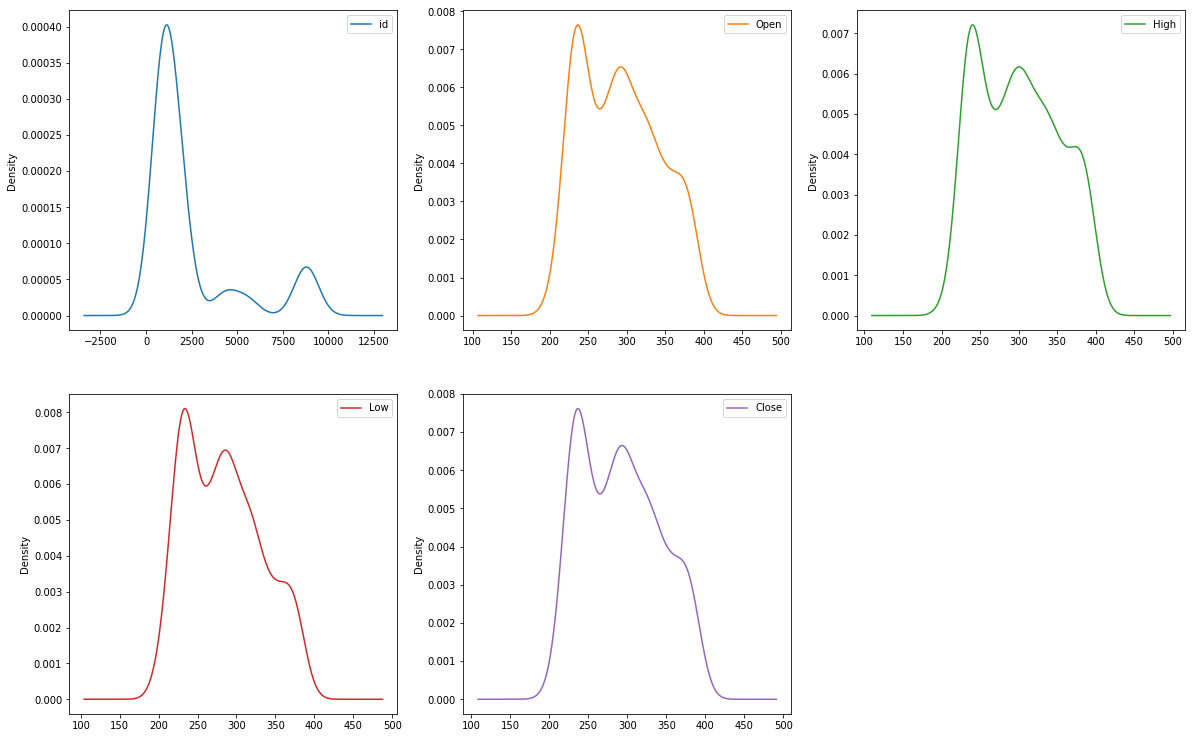

In [45]:
ccdf.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

The above density plot are against the four main columns and show that the data is now distributed in a better way than it was before the data imputation. All the above distributions show the density and how the data after imputation is travelling. All the distributions have a hike in the beginning and gradually decrease towards the end and this shows that the distribution is of type - Gamma Distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB43560F60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001DB439FB1D0>]], dtype=object)

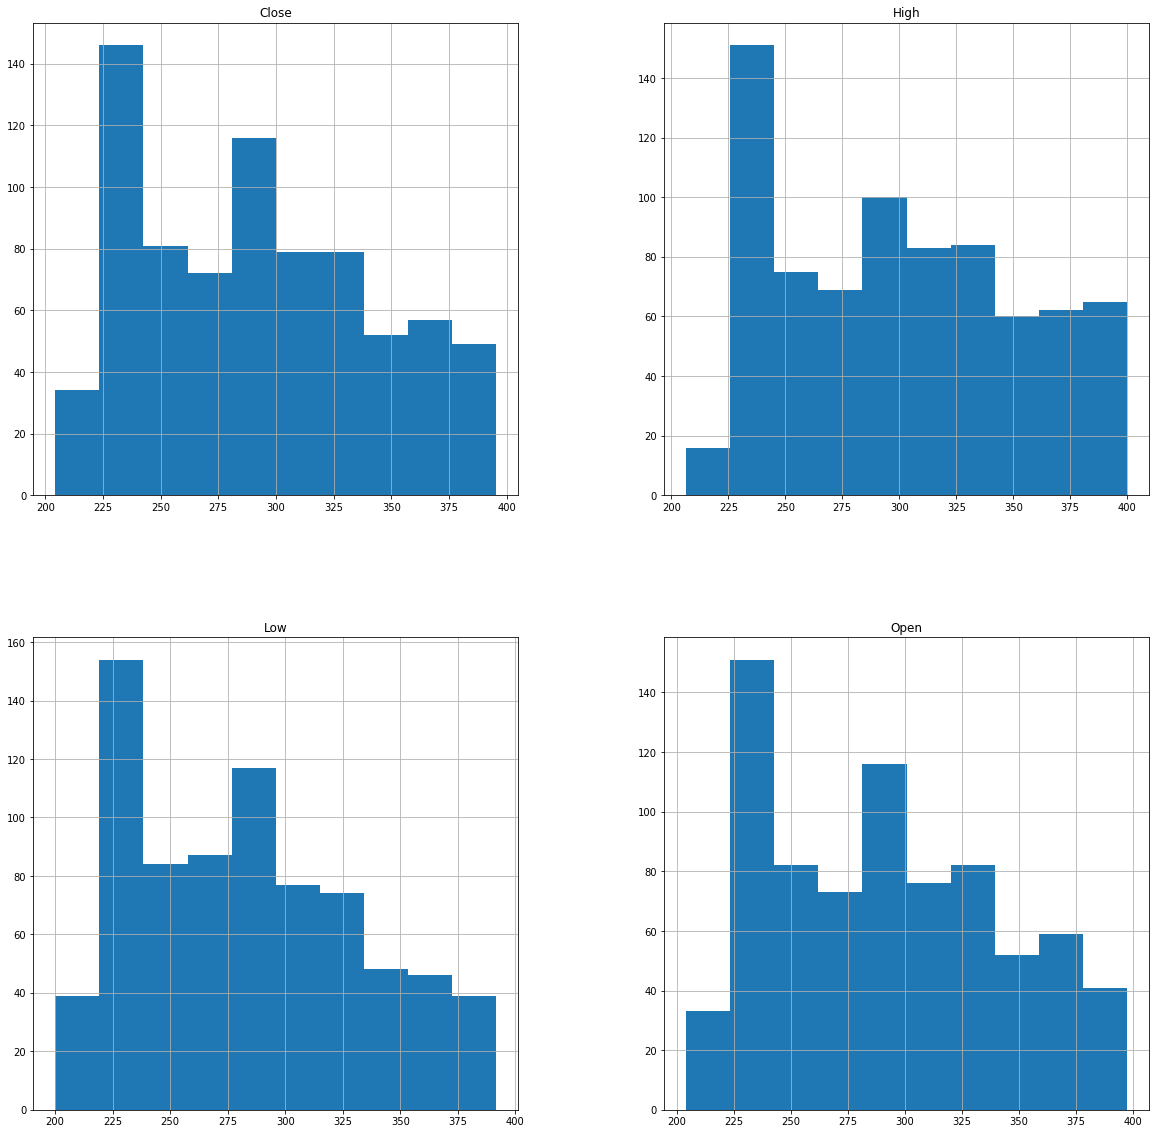

In [46]:
ccdf.hist(['Open','Close','High','Low'])

The histograms show that there is a peak in the start and then the distribution is low as the distribution is travelling forward

Identifying variance 

In [47]:
ccdf.var()

id       6.484218e+06
Open     2.539448e+03
High     2.695409e+03
Low      2.349108e+03
Close    2.498464e+03
dtype: float64

# Pair plot showing the correlations between 4 main variables

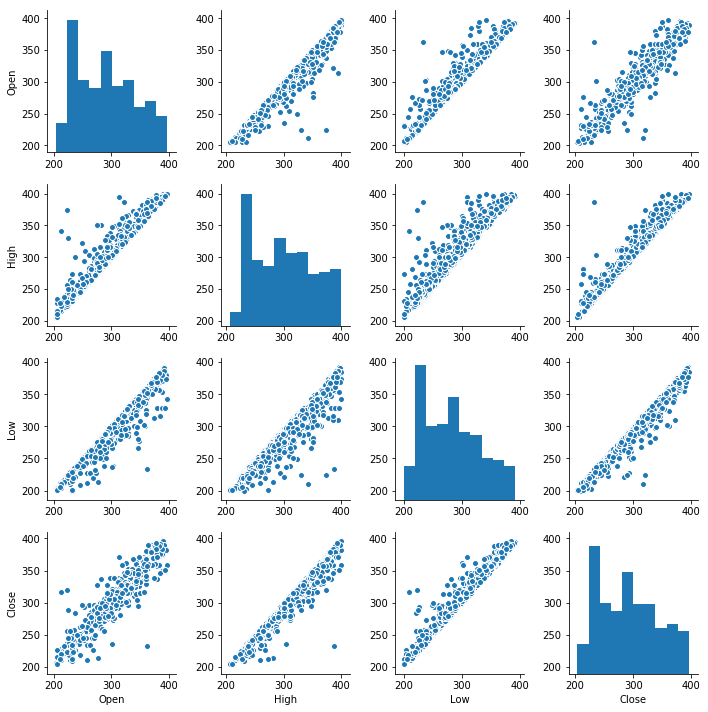

In [48]:
sns.pairplot((ccdf.loc[:,'Open':'Close']))

There is high correlations between all the 4 variables Open, High , Close and Low
So a pair plot can be used to show the same 
1. Open and High are les correlated and vice-versa except for a few instances
2. Close and Low are less correlated except a few instances
3. High and Close are correlated except a few points
4. Open and Low are minutely correlated and viceversa except for a few datasets
5. Low and High are least correlated amongst all the others

           Open     Close      High       Low
Open   1.000000  0.956762  0.968700  0.968975
Close  0.956762  1.000000  0.976823  0.975929
High   0.968700  0.976823  1.000000  0.945975
Low    0.968975  0.975929  0.945975  1.000000


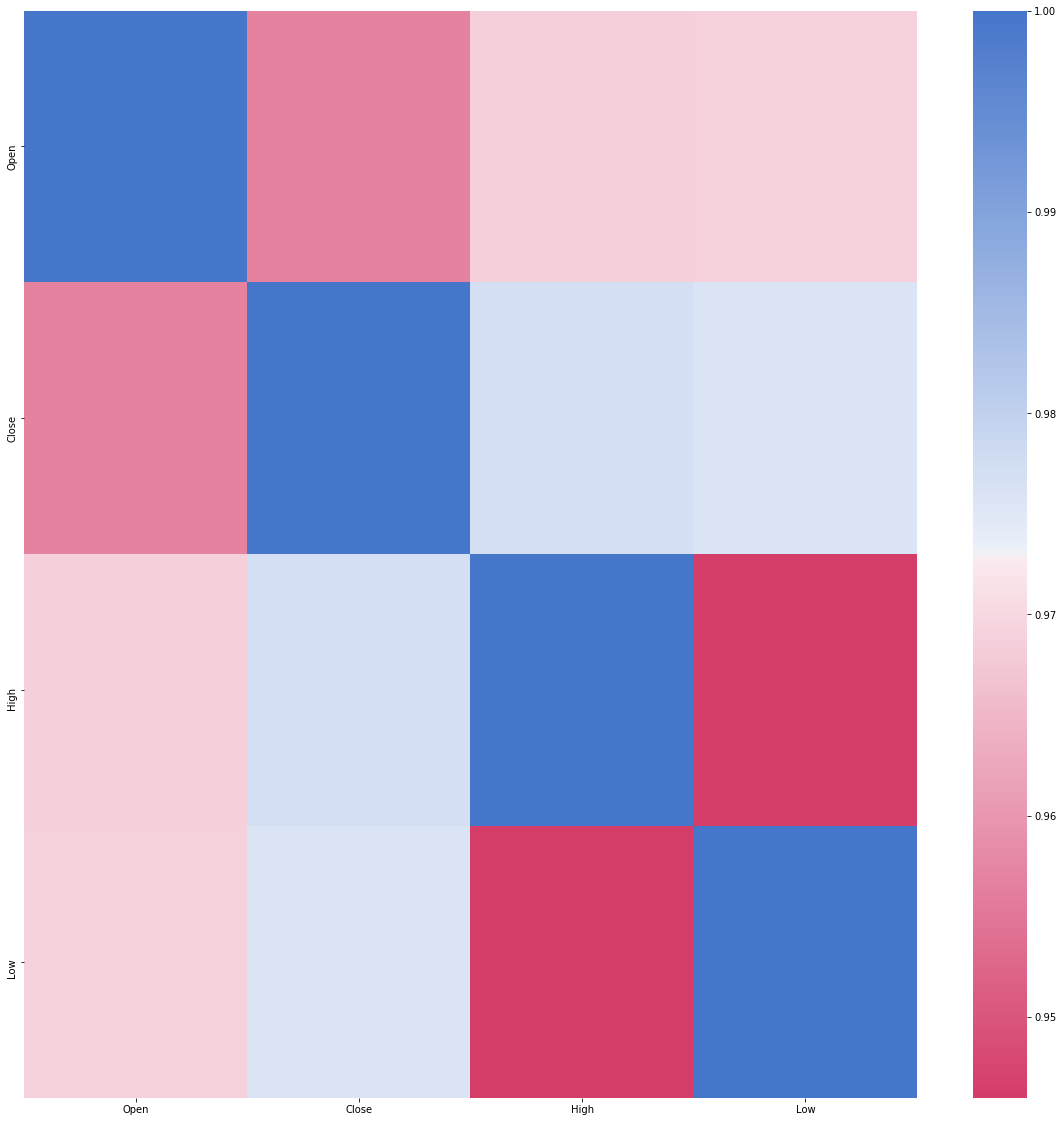

In [51]:
cmap = sns.diverging_palette(0,255,sep=1, n=256, as_cmap=True)
correlations = ccdf[['Open', 'Close', 'High', 'Low']].corr()
print(correlations)
sns.heatmap(correlations,cmap=cmap)

The heat map gives the same inference as the pair plot which can be used for concluding that the variables are correlated. 

# Bar charts for understanding the data distribution against the deciding variable

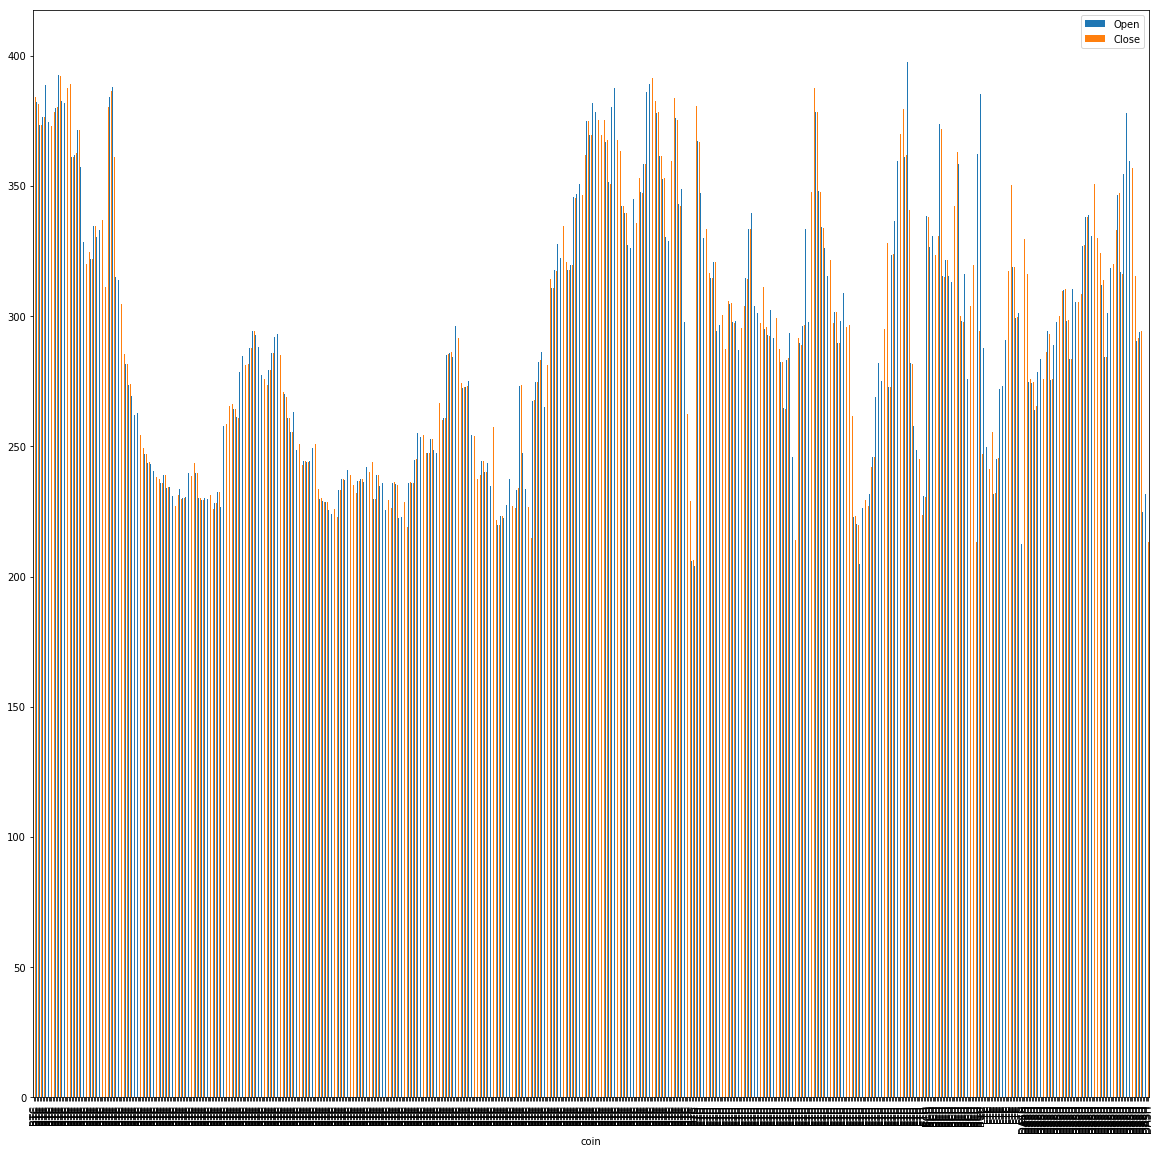

In [52]:
ccdf.plot(x="coin", y=["Open", "Close"], kind="bar")
plt.show()

This bar graph shows the crypto currecny reprenstation of its open and close prices  . 
Since the data is too large onlt the top few instances can be taken into consideraton for doing optimum analysis


        id        Date    Open    High     Low   Close      Volume  \
1927  1928   6/14/2017  397.59  399.32  342.21  359.05  1272580000   
712    713   1/28/2016  395.15  395.50  379.74  380.29    59247900   
1181  1182  10/16/2014  394.52  398.81  373.07  382.56    26990000   
8824  8825    9/2/2017  393.53  395.92  329.27  350.17    54813400   
713    714   1/27/2016  392.44  396.84  391.78  394.97    47424400   
714    715   1/26/2016  392.00  397.77  390.57  392.15    58147000   
1178  1179  10/19/2014  391.25  393.94  386.46  389.55     5914570   
764    765   12/7/2015  389.98  399.97  385.41  395.54    63455800   
1177  1178  10/20/2014  389.23  390.08  378.25  382.85    16419000   
704    705    2/5/2016  388.90  391.09  385.57  386.55    43825000   

       Market.Cap  coin  
1927  36761600000   ETH  
712    5980180000   BTC  
1181   5281630000   BTC  
8824   2962400000  DASH  
713    5937780000   BTC  
714    5929520000   BTC  
1178   5242370000   BTC  
764    5821140000   B

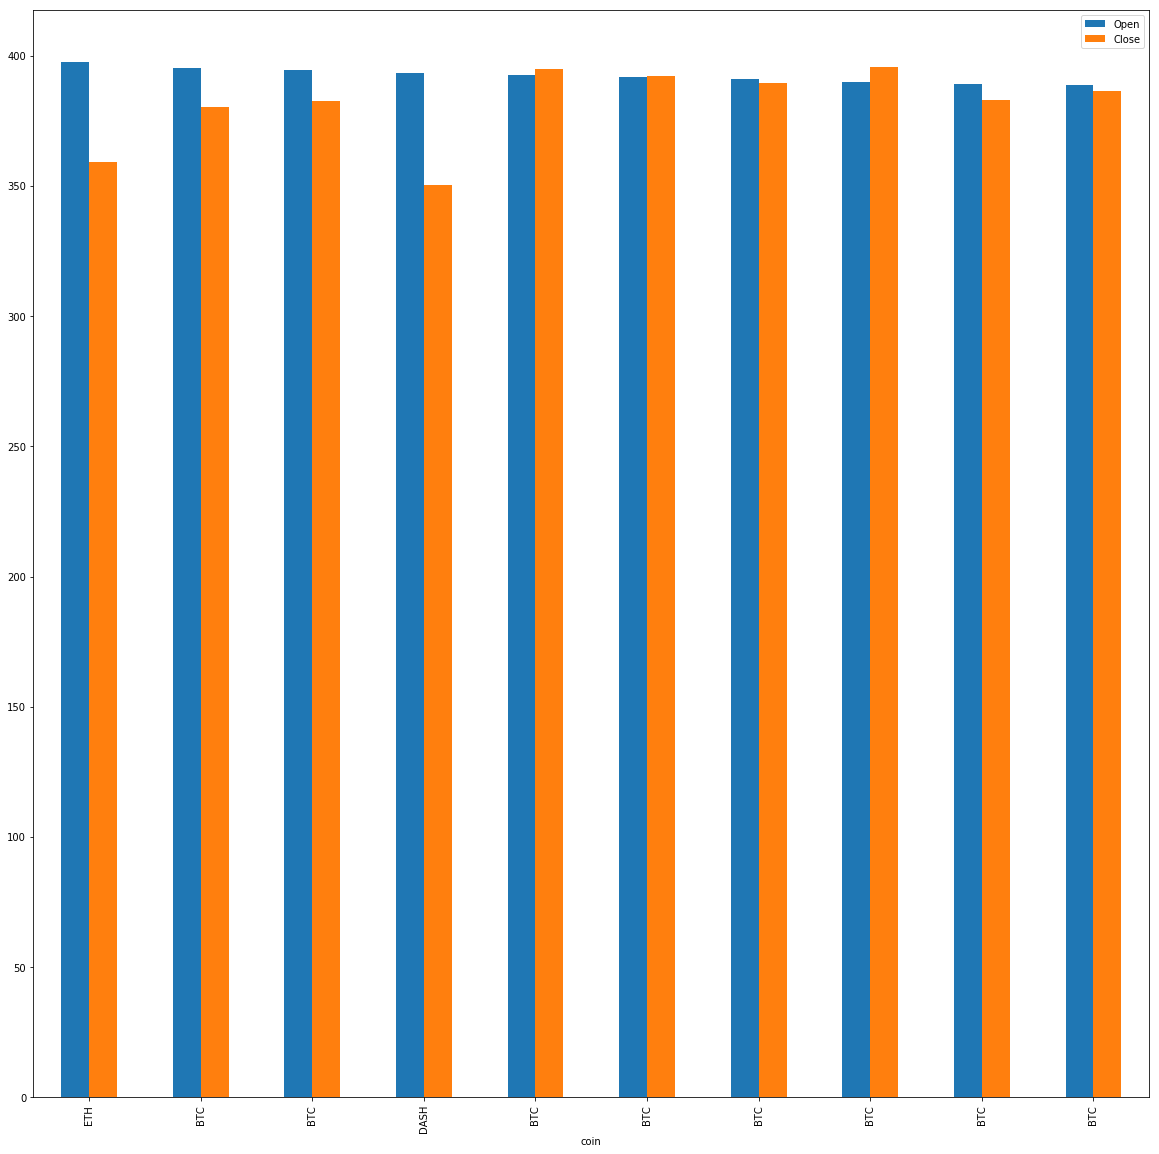

In [53]:
ccdf_filter = ccdf.sort_values('Open', ascending=False)
revData = ccdf_filter.head(10)
print(revData)
revData.plot(x="coin", y=["Open", "Close", "Volume"], kind="bar")
plt.show()

After the data is filtered , the bar graph shows that the BTC and ETH is performing the best amongst all the other coins and this is the reason for its increasing volume as compared to the other coins.

In [54]:
ccdf['YEAR'] = pd.DatetimeIndex(ccdf['Date']).year

In [55]:
ccdf['MONTH'] = pd.DatetimeIndex(ccdf['Date']).month

In [56]:
ccdf_BTC = ccdf[ccdf['coin'].isin(['BTC'])]

In [57]:
ccdf_BTC_18  = ccdf_BTC[ccdf_BTC['YEAR'].isin([2016])]

In [58]:
ccdf_BTC_Jan = ccdf_BTC_18[ccdf_BTC_18['MONTH'].isin([1])]

In [59]:
ccdf_BTC_Jan .sort_values(by=['Date'])

,id,Date,Open,High,Low,Close,Volume,Market.Cap,coin,YEAR,MONTH
724,725,1/16/2016,365.07,390.56,354.91,387.54,120352000,5507790000,BTC,2016,1
723,724,1/17/2016,387.15,390.96,380.09,382.30,45319600,5842270000,BTC,2016,1
722,723,1/18/2016,381.73,388.10,376.67,387.17,54403900,5761940000,BTC,2016,1
721,722,1/19/2016,387.03,387.73,378.97,380.15,46819800,5843510000,BTC,2016,1
717,718,1/23/2016,382.43,394.54,381.98,387.49,56247400,5779890000,BTC,2016,1
714,715,1/26/2016,392.00,397.77,390.57,392.15,58147000,5929520000,BTC,2016,1
713,714,1/27/2016,392.44,396.84,391.78,394.97,47424400,5937780000,BTC,2016,1
712,713,1/28/2016,395.15,395.50,379.74,380.29,59247900,5980180000,BTC,2016,1
711,712,1/29/2016,380.11,384.38,365.45,379.47,86125300,5753970000,BTC,2016,1
710,711,1/30/2016,378.87,380.92,376.49,378.25,30284400,5736760000,BTC,2016,1


In [60]:
ccdf_BTC_Jan.head()

,id,Date,Open,High,Low,Close,Volume,Market.Cap,coin,YEAR,MONTH
709,710,1/31/2016,378.29,380.35,367.83,368.77,37894300,5729870000,BTC,2016,1
710,711,1/30/2016,378.87,380.92,376.49,378.25,30284400,5736760000,BTC,2016,1
711,712,1/29/2016,380.11,384.38,365.45,379.47,86125300,5753970000,BTC,2016,1
712,713,1/28/2016,395.15,395.50,379.74,380.29,59247900,5980180000,BTC,2016,1
713,714,1/27/2016,392.44,396.84,391.78,394.97,47424400,5937780000,BTC,2016,1


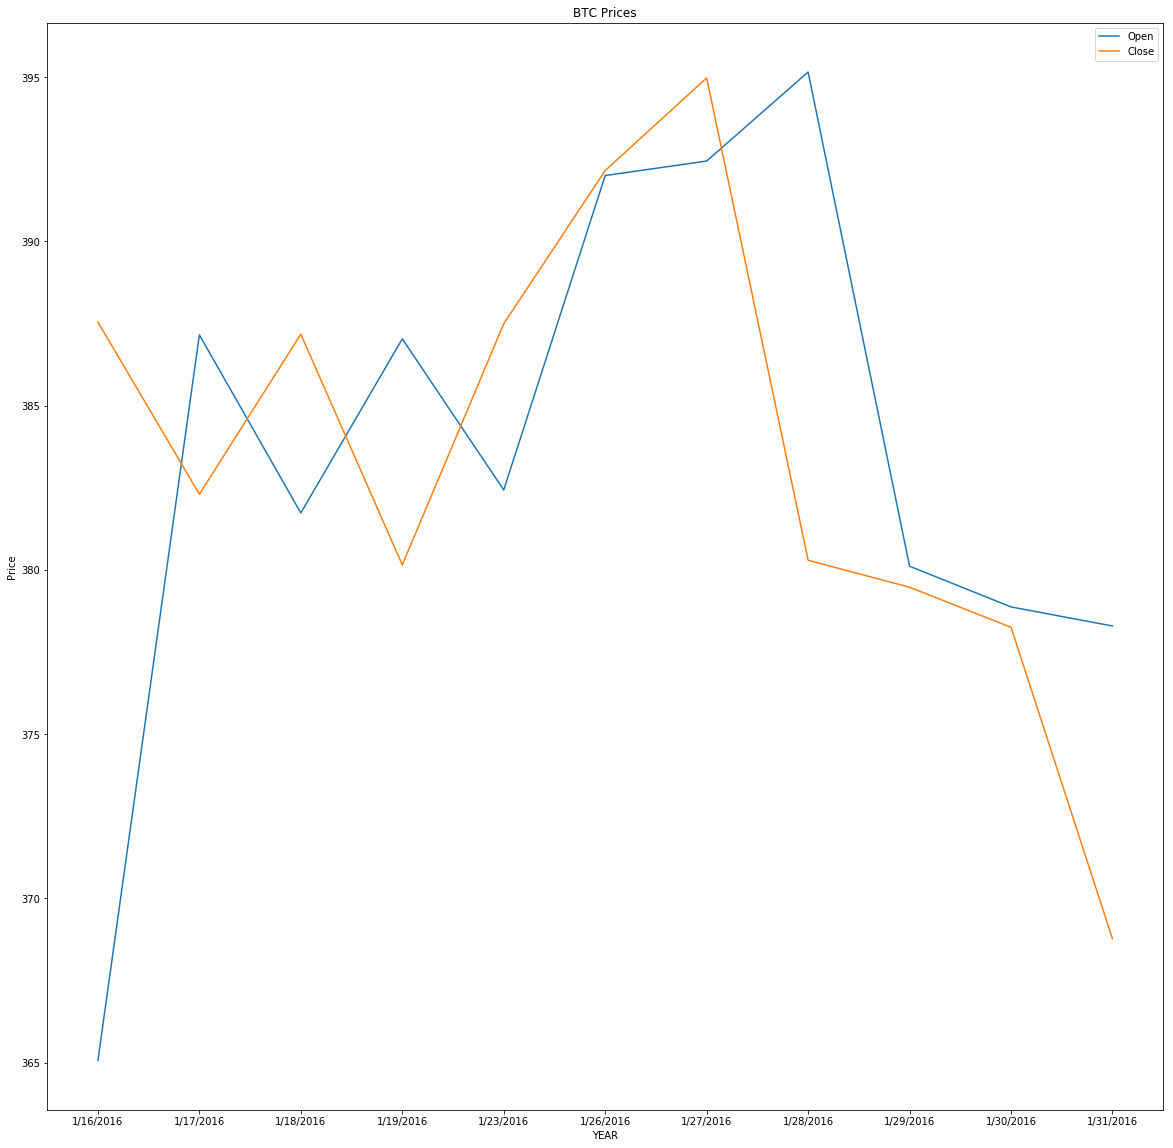

In [61]:
plt.plot(ccdf_BTC_Jan["Date"], ccdf_BTC_Jan["Open"], label="Open")
plt.plot(ccdf_BTC_Jan["Date"],ccdf_BTC_Jan["Close"], label="Close")
plt.xlabel("YEAR")
plt.ylabel("Price")
plt.title("BTC Prices")
plt.legend()
plt.show()

The time series plot above shows how BTC has performed in the year 2016 in the month of January. We see that there is 1 highest peak and 
multiple small peaks . In the same way other coins can be analysed for yearly and monthly data which can be used for predictig the opening 
and closing prices. 

The peaks in BTC for the month of Jan show that BTC has highest volume and Market Cap than other coins over the time period.

The relatinship between Open , Low , Volume and Market Cap will benefit the prediction problem .